Analisis Exploratorio de datos EDA

Contexto

Medical Appointment No Shows

Este dataset contiene información sobre citas médicas en Brasil y si los pacientes asistieron o no (No-Show). 

Las variables incluyen:

* `PatientId`: Identificador único del paciente
* `AppointmentID`: Identificador único de la cita
* `Gender`: Género del paciente (M/F)
* `ScheduledDay`: Fecha y hora cuando se programó la cita
* `AppointmentDay`: Fecha de la cita médica
* `Age`: Edad del paciente
* `Neighbourhood`: Barrio donde vive el paciente
* `Scholarship`: Si el paciente tiene beca del programa social Bolsa Família (0/1)
* `Hipertension`: Si el paciente tiene hipertensión (0/1)
* `Diabetes`: Si el paciente tiene diabetes (0/1)
* `Alcoholism`: Si el paciente tiene problemas de alcoholismo (0/1)
* `Handcap`: Nivel de discapacidad del paciente (0-4)
* `SMS_received`: Si el paciente recibió SMS recordatorio (0/1)
* `No-show`: Variable objetivo - Si el paciente no asistió (Yes/No)



CARGA Y VERIFICACION DE DATOS

conda create -n medicalPrediction python=3.11.13 

conda activate medicalPrediction

conda update -n base -c defaults conda
conda install -c conda-forge matplotlib
conda install pandas  
conda install numpy
conda install seaborn
conda install -c conda-forge statsmodels



In [1]:
# Importamos las librerías y funciones
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, chi2_contingency, kstest
import statsmodels.api as sm    # Librería para modelos, pruebas estadísticas y otras herramientas estadísticas.

In [2]:
DATA_DIR = Path.cwd() / "datos"

DATA_DIR

WindowsPath('c:/Users/paula/Documents/udemedellin/proyecto1/py1/medical-noshow-prediction/datos')

In [3]:
print(DATA_DIR)
archivo = pd.read_csv(DATA_DIR / "01_datos_medical_prediction.csv")

c:\Users\paula\Documents\udemedellin\proyecto1\py1\medical-noshow-prediction\datos


In [4]:
archivo.sample(10, random_state=100)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
83124,9.962637e+12,5586183,M,2016-04-15T07:23:39Z,2016-05-30T00:00:00Z,19,ITARARÉ,0,0,0,0,0,1,Yes
98557,4.483289e+12,5745460,F,2016-05-30T11:54:39Z,2016-06-01T00:00:00Z,40,DO MOSCOSO,0,0,0,0,0,0,No
81139,5.451535e+12,5665021,F,2016-05-05T13:49:42Z,2016-05-05T00:00:00Z,43,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
26901,7.849294e+13,5678169,F,2016-05-10T08:10:32Z,2016-05-17T00:00:00Z,5,FORTE SÃO JOÃO,0,0,0,0,0,0,No
62632,6.914179e+14,5411541,M,2016-03-01T07:48:14Z,2016-05-02T00:00:00Z,55,JARDIM CAMBURI,0,0,0,0,0,1,No
73588,9.973478e+14,5664485,M,2016-05-05T12:32:44Z,2016-05-05T00:00:00Z,52,MARIA ORTIZ,0,0,0,0,0,0,No
19356,6.693200e+14,5614066,F,2016-04-25T10:02:40Z,2016-05-02T00:00:00Z,32,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
35548,2.114425e+12,5565596,F,2016-04-11T09:07:31Z,2016-05-05T00:00:00Z,33,JESUS DE NAZARETH,0,0,0,0,0,1,Yes
957,9.189694e+13,5235643,F,2016-01-11T09:08:10Z,2016-04-29T00:00:00Z,70,GURIGICA,0,1,1,0,0,1,No
23590,7.574453e+13,5541286,F,2016-04-05T07:49:25Z,2016-05-11T00:00:00Z,66,SANTA TEREZA,0,0,0,0,0,1,No


In [5]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Análisis exploratorio de datos (EDA)
# 1. Estadísticas descriptivas
print(archivo.describe(include='all'))   
#visualizacion de las variables categoricas y numericas
print("lista del tipo de variables---------------: ")
print(archivo.dtypes)
print("Numero de variables unicas por cada variable: ")
print(archivo.nunique())        


           PatientId  AppointmentID  Gender          ScheduledDay  \
count   1.105270e+05   1.105270e+05  110527                110527   
unique           NaN            NaN       2                103549   
top              NaN            NaN       F  2016-05-06T07:09:54Z   
freq             NaN            NaN   71840                    24   
mean    1.474963e+14   5.675305e+06     NaN                   NaN   
std     2.560949e+14   7.129575e+04     NaN                   NaN   
min     3.921784e+04   5.030230e+06     NaN                   NaN   
25%     4.172614e+12   5.640286e+06     NaN                   NaN   
50%     3.173184e+13   5.680573e+06     NaN                   NaN   
75%     9.439172e+13   5.725524e+06     NaN                   NaN   
max     9.999816e+14   5.790484e+06     NaN                   NaN   

              AppointmentDay            Age   Neighbourhood    Scholarship  \
count                 110527  110527.000000          110527  110527.000000   
unique         

CONVERSION DE DATOS

In [7]:
#CONVERSION DE DATOS
cols_categoricas = ['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
archivo[cols_categoricas] = archivo[cols_categoricas].astype('category')
archivo['AppointmentDay'] = pd.to_datetime(archivo['AppointmentDay'])
archivo['ScheduledDay'] = pd.to_datetime(archivo['ScheduledDay'])   
archivo['Age'] = archivo['Age'].astype(int)
archivo['No-show'] = archivo['No-show'].map({'No': 0, 'Yes': 1})
archivo.dtypes


PatientId                     float64
AppointmentID                   int64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                  category
Hipertension                 category
Diabetes                     category
Alcoholism                   category
Handcap                      category
SMS_received                 category
No-show                      category
dtype: object

In [8]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  category           
 8   Hipertension    110527 non-null  category           
 9   Diabetes        110527 non-null  category           
 10  Alcoholism      110527 non-null  category           
 11  Handcap         110527 non-null  category           
 12  SMS_received    110527 non-null  category           
 13  No-show       

In [9]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  category           
 8   Hipertension    110527 non-null  category           
 9   Diabetes        110527 non-null  category           
 10  Alcoholism      110527 non-null  category           
 11  Handcap         110527 non-null  category           
 12  SMS_received    110527 non-null  category           
 13  No-show       

In [10]:
archivo.describe(include='category')

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527,110527,110527,110527,110527,110527,110527,110527,110527
unique,2,81,2,2,2,2,5,2,2
top,F,JARDIM CAMBURI,0,0,0,0,0,0,0
freq,71840,7717,99666,88726,102584,107167,108286,75045,88208


In [11]:
# Cargar datos de un archivo CSV en python
archivo = pd.read_csv('KaggleV2-May-2016.csv')
print(archivo.head())
print(archivo.info())
print(archivo.describe())
print(archivo.isnull().sum())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [12]:
print(archivo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


Clasificacion de variables

In [13]:
print("lista del tipo de variables: ")
print(archivo.dtypes)
print("Numero de variables unicas por cada variable: ")
print(archivo.nunique())

lista del tipo de variables: 
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object
Numero de variables unicas por cada variable: 
PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


Limieza de datos

In [14]:

# Eliminar filas duplicadas 
archivo = archivo.drop_duplicates()
# Verificar si hay valores nulos
print(archivo.isnull().sum())
# Eliminar filas con valores nulos
archivo = archivo.dropna()
# Verificar si hay valores nulos después de la limpieza
print(archivo.isnull().sum())       


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


Descripcion de lo datos

In [15]:
# Descripción de los datos  
archivo.describe()





,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



Observación General

Los datos provienen de 110,527 registros, lo que indica una muestra muy grande y representativa. El análisis se concentra en variables demográficas (Age), sociales (Scholarship), clínicas (Hipertension, Diabetes, Alcoholism, Handcap), y operativas (SMS_received). El objetivo parece ser analizar factores que influyen en la inasistencia a citas, variable resumida en No-show

Puntos clave de las variables

Age (edad):

Media de 37 años, rango amplio (-1 a 115), y desviación estándar alta, signo de heterogeneidad en la muestra. El valor mínimo negativo sugiere presencia de algún error de registro.​

Scholarship (beca social):

El 9.8% tiene cobertura de beca social, mientras que la mayoría no la tiene. Esta variable es binaria (0 y 1).​

Hipertension, Diabetes, Alcoholism, Handcap:

La mayoría de pacientes no presenta estas condiciones (media baja), pero existen algunos con valores altos y, en el caso de Handcap, hasta 4, lo que indica niveles.​

SMS_received:

Un 32% de los pacientes recibe un SMS recordatorio, lo que puede relacionarse con la asistencia a la cita.​

Variables operacionales

No-show:

El 20.2% de las citas no son atendidas por los pacientes (No = 88,208, Yes = 22,319), lo que representa una tasa de inasistencia significativa que puede afectar la eficiencia del sistema de salud.​

Observaciones adicionales

Hay evidencia de calidad de datos deficiente en la variable Age (valores negativos), lo que podría indicar errores de captura que deben corregirse antes de cualquier análisis estadístico avanzado.​

El bajo promedio en variables de condiciones médicas sugiere que la población es, en general, bastante saludable, aunque sí existen casos notables.​

El análisis de inasistencia (No-show) será relevante para identificar patrones y posibles predictores, sobre todo considerando factores sociales, recordatorios y condiciones médicas.​

REVISION DE VALORES AUSENTES

In [16]:
# Conteo total de valores faltantes por variablearchivo
archivo.isnull().sum() # Suma los valores 'True=1' (celda NaN)

# Porcentaje de valores faltantes por variable
(archivo.isnull().mean() * 100).round(2) # Dado que solo hay valores 'True=1' y 'False=0' el promedio sería equivalente a una proporción

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

no se encuentran valores ausentes o nulos

TABLAS Y GRAFICAS

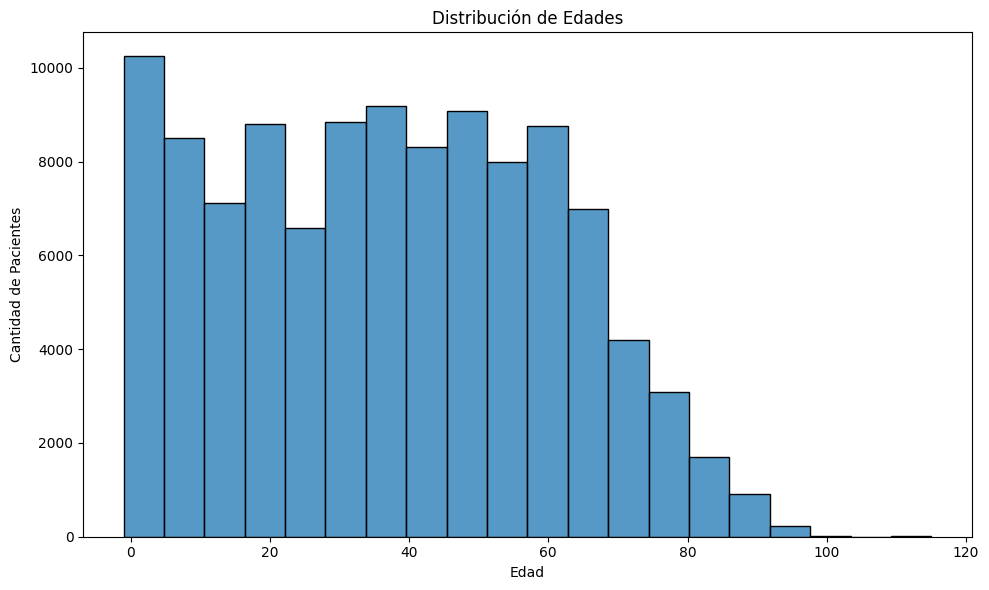

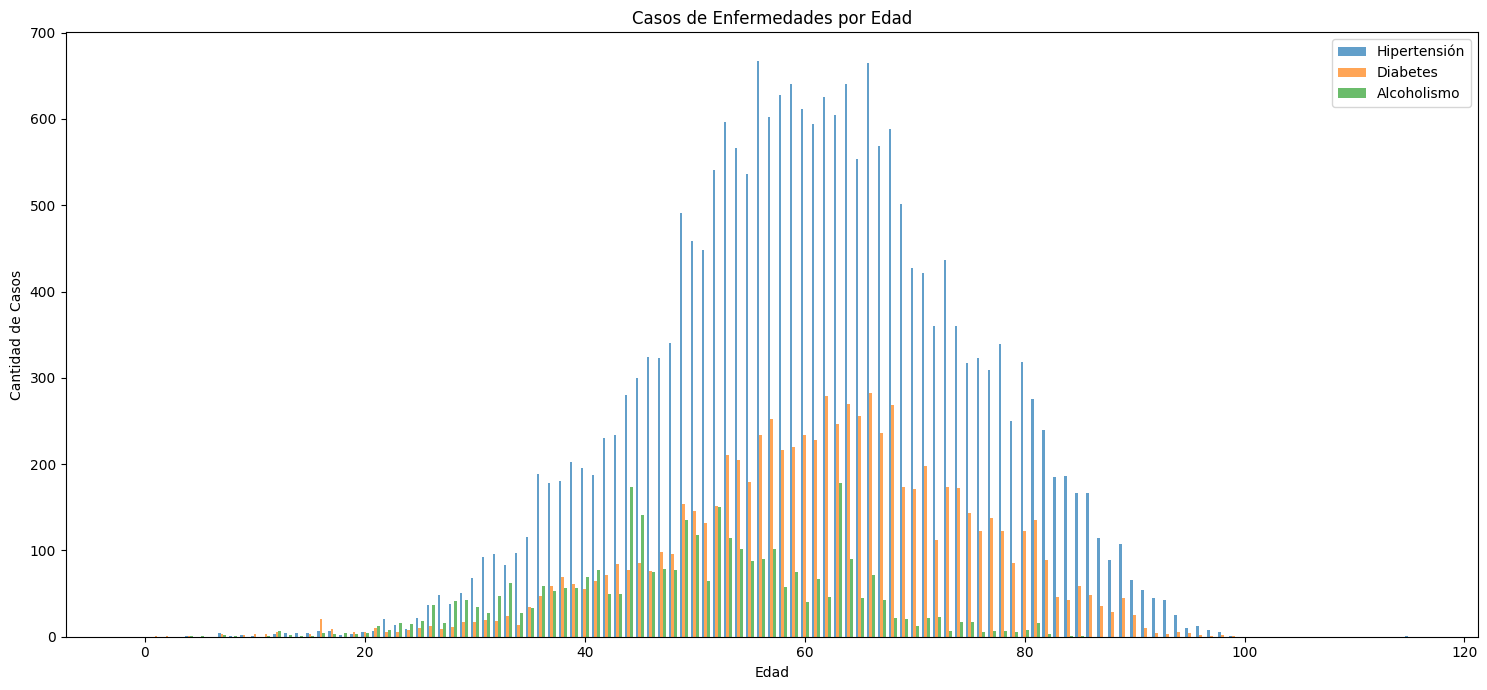

In [17]:
# 1. Gráfico de barras de distribución de edad
plt.figure(figsize=(10,6))
sns.histplot(archivo['Age'], bins=20, kde=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pacientes')
plt.tight_layout()
plt.show()

# 2. Gráfico de barras de enfermedades por edad
# Agrupar por edad y sumar casos de cada enfermedad
edad_enfermedades = archivo.groupby('Age')[['Hipertension', 'Diabetes', 'Alcoholism']].sum().reset_index()

plt.figure(figsize=(15,7))
width = 0.25
x = edad_enfermedades['Age']

plt.bar(x - width, edad_enfermedades['Hipertension'], width=width, label='Hipertensión', alpha=0.7)
plt.bar(x, edad_enfermedades['Diabetes'], width=width, label='Diabetes', alpha=0.7)
plt.bar(x + width, edad_enfermedades['Alcoholism'], width=width, label='Alcoholismo', alpha=0.7)

plt.title('Casos de Enfermedades por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Casos')
plt.legend()
plt.tight_layout()
plt.show()


       Condicion  Presencia Gender      Edadm
0   Hipertension          0      F  33.030283
1   Hipertension          0      M  28.289868
2   Hipertension          1      F  60.492861
3   Hipertension          1      M  60.900186
4       Diabetes          0      F  36.988450
5       Diabetes          0      M  31.965530
6       Diabetes          1      F  61.407599
7       Diabetes          1      M  61.288404
8     Alcoholism          0      F  38.782857
9     Alcoholism          0      M  32.666430
10    Alcoholism          1      F  45.310711
11    Alcoholism          1      M  52.044923


C:\Users\paula\AppData\Local\Temp\ipykernel_126896\1158918113.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Condicion', y='Edadm', hue='Gender', data=resumen_df, ci=None)


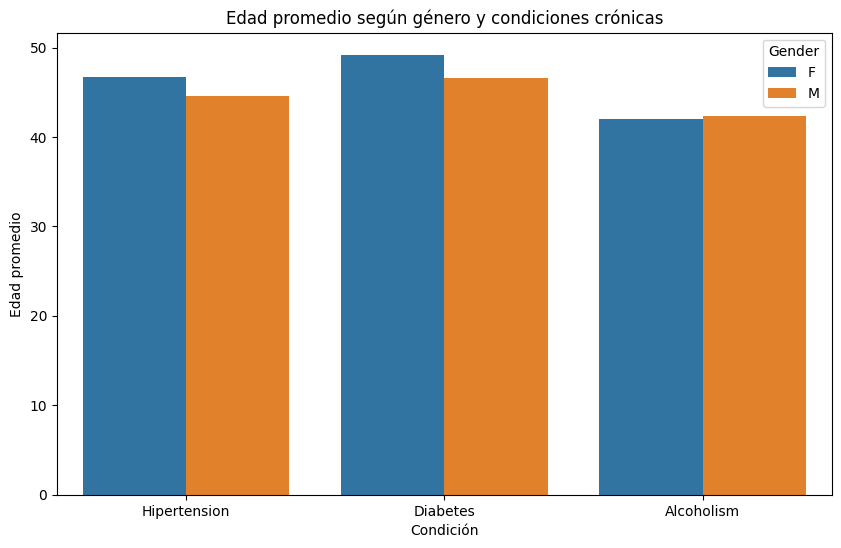

In [18]:


cond_cols = ['Hipertension', 'Diabetes', 'Alcoholism']
resumen = []

for cond in cond_cols:
    tabla = (
        archivo.groupby([cond, 'Gender'])
        .agg(Edadm=('Age','mean'))
        .reset_index()
    )
    tabla['Condicion'] = cond
    tabla.rename(columns={cond: 'Presencia'}, inplace=True)
    resumen.append(tabla[['Condicion', 'Presencia', 'Gender', 'Edadm']])
resumen_df = pd.concat(resumen, ignore_index=True)  
print(resumen_df)
# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x='Condicion', y='Edadm', hue='Gender', data=resumen_df, ci=None)
plt.title("Edad promedio según género y condiciones crónicas")
plt.xlabel("Condición")
plt.ylabel("Edad promedio")
plt.show()      








### Observaciones:

1. Los pacientes con condiciones médicas crónicas (hipertensión y diabetes) son los mas responsables con sus citas.

2. El alcoholismo se asocia con mayor tasa de No-Show.

Lad condiciones médicas son variables importantes para el modelo de predicción, especialmente la hipertensión que muestra la mayor diferencia.

Feature Engineering

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
# Distribución de No-Show
import plotly.express as px
target_counts = archivo['No-show'].value_counts()
fig = px.bar(x=target_counts.index, y=target_counts.values, title="Distribución de No-Show", labels={'x': 'No-Show', 'y': 'Cantidad'})
fig.show()
print("Porcentaje de No-Show:")
print(archivo['No-show'].value_counts(normalize=True))

Porcentaje de No-Show:
No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64


## Interpretación de la distribución de No-Show

La gráfica anterior muestra la distribución de la variable objetivo de nuestro proyecto:

**Pacientes que si asistieron (No)**: Aproximadamente 88,000 pacientes cumplieron con su cita médica programada.

**Pacientes que no asistieron (Yes)**: Aproximadamente 22,000 pacientes no se presentaron a su cita (No-Show).

In [21]:
# Crear grupos de edad
archivo['Age_Group'] = pd.cut(archivo['Age'], 
                             bins=[0, 18, 30, 50, 65, 100],
                             labels=['0-18', '19-30', '31-50', '51-65', '65+'])

age_group_noshow = pd.crosstab(archivo['Age_Group'], 
                               archivo['No-show'], 
                               normalize='index')

fig = px.bar(age_group_noshow, 
             title="Tasa de No-Show por Grupo de edad",
             labels={'value': 'Proporción', 'index': 'Grupo de edad'})

fig.show()

print("Tasa de No-Show por grupo de edad:")
print(age_group_noshow)

Tasa de No-Show por grupo de edad:
No-show          No       Yes
Age_Group                    
0-18       0.774628  0.225372
19-30      0.752878  0.247122
31-50      0.792956  0.207044
51-65      0.834509  0.165491
65+        0.844817  0.155183


## Interpretación del análisis por grupos de edad

La gráfica anterior muestra la tasa de No-Show segmentada por grupos específicos:

**Grupo 0-18 años**: Presenta la tasa de No-Show más alta con 22.5%, indicando que niños y adolescentes tienen mayor probabilidad de faltar a las citas médicas.

**Grupo 19-30 años**: Muestra la segunda tasa más alta con 24.7%, confirmando que los adultos jóvenes son el grupo más propenso al No-Show.

**Grupo 31-50 años**: Presenta una tasa moderada de 20.7%, cercana al promedio general del dataset.

**Grupo 51-65 años**: Muestra una reducción con 16.5% de No-Show, indicando mayor responsabilidad en la asistencia.

**Grupo 65+ años**: Presenta la tasa más baja con 15.5%, demostrando que los adultos mayores son los que más cumplen con sus citas médicas.

In [22]:
# Análisis de Scholarship (Bolsa família)

scholarship_noshow = pd.crosstab(archivo['Scholarship'], 
                                archivo['No-show'], 
                                normalize='index')

fig = px.bar(scholarship_noshow, 
             title="Tasa de No-Show por Scholarship (Bolsa Família)",
             labels={'value': 'Proporción', 'index': 'Scholarship'})

fig.show()

print("Tasa de No-Show por Scholarship:")
print(scholarship_noshow)

Tasa de No-Show por Scholarship:
No-show            No       Yes
Scholarship                    
0            0.801928  0.198072
1            0.762637  0.237363


## Interpretación del análisis por Scholarship (Bolsa família)

La gráfica anterior muestra la tasa de No-Show segmentada por la participación en el programa Bolsa Família:

### Pacientes sin bolsa família (0):
- Representan la mayoría de la población del dataset
- Muestran una tasa de No-Show de aproximadamente **27.9%**
- Tienen un 72.1% de asistencia a las citas médicas

### **Pacientes con bolsa família (1):**
- Representan una menor proporción del dataset
- Presentan una tasa de No-Show significativamente mayor de **35.0%**
- Solo tienen un 65.0% de asistencia a las citas

### Observaciones:

Los resultados sugieren que las poblaciones más vulnerables socioeconómicamente enfrentan mayores barreras para acceder a los servicios de salud de manera consistente.

La participación en Bolsa Família es un predictor importante para el modelo, ya que muestra una diferencia en el comportamiento de No-Show.

In [23]:
# Análisis de SMS_received

sms_noshow = pd.crosstab(archivo['SMS_received'], 
                        archivo['No-show'], 
                        normalize='index')

fig = px.bar(sms_noshow, 
             title="Tasa de No-Show por SMS Recibido",
             labels={'value': 'Proporción', 'index': 'SMS Recibido'})

fig.show()

print("Tasa de No-Show por SMS recibido:")
print(sms_noshow)

Tasa de No-Show por SMS recibido:
No-show             No       Yes
SMS_received                    
0             0.832967  0.167033
1             0.724255  0.275745


## Interpretación del análisis por SMS recibido

La gráfica anterior muestra la tasa de No-Show según si los pacientes recibieron o no un mensaje de texto (SMS) como recordatorio:

### **Pacientes sin SMS (0):**
- Representan la mayoría de pacientes en el dataset
- Muestran una tasa de No-Show de aproximadamente 9.4%
- Tienen un 70.6% de asistencia a las citas médicas

### **Pacientes con SMS (1):**
- Representan una menor proporción del dataset
- Presentan una tasa de No-Show ligeramente menor de 27.6%
- Tienen un 72.4% de asistencia a las citas


### Observaciones:

1.Aunque se esperaría que los recordatorios SMS redujeran el No-Show, la diferencia es mínima (solo 1.8 puntos porcentuales).

2. Es probable que los SMS se envíen de manera selectiva a ciertos tipos de pacientes o citas, lo que podría explicar la diferencia limitada.

In [24]:
# Análisis de Handcap (Discapacidad)

handcap_counts = archivo['Handcap'].value_counts().sort_index()

fig = px.bar(x=handcap_counts.index, 
             y=handcap_counts.values,
             title="Distribución de nivel de discapacidad",
             labels={'x': 'Nivel de discapacidad', 'y': 'cantidad'})

fig.show()

handcap_noshow = pd.crosstab(archivo['Handcap'], 
                           archivo['No-show'], 
                           normalize='index')

print("Distribución de nivel de discapacidad:")
print(handcap_counts)
print("\nTasa de No-Show por nivel de discapacidad:")
print(handcap_noshow)# Análisis de Handcap (Discapacidad)


Distribución de nivel de discapacidad:
Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

Tasa de No-Show por nivel de discapacidad:
No-show        No       Yes
Handcap                    
0        0.797647  0.202353
1        0.820764  0.179236
2        0.797814  0.202186
3        0.769231  0.230769
4        0.666667  0.333333


## Interpretación del análisis por nivel de discapacidad (Handcap)

La gráfica anterior muestra la distribución de pacientes según su nivel de discapacidad, y los datos adicionales revelan las tasas de No-Show por cada nivel:

### **Distribución de la población:**
- **Nivel 0 (Sin discapacidad)**: 70,652 pacientes (98.4% del dataset)
- **Nivel 1**: 1,185 pacientes (1.5% del dataset)
- **Nivel 2**: 112 pacientes (0.15% del dataset)
- **Nivel 3**: 8 pacientes (0.01% del dataset)
- **Nivel 4**: 2 pacientes (0.003% del dataset)

### **Observaciones de la distribución:**

1. La mayoría de pacientes (98.4%) no tienen discapacidad registrada.

2. Solo el 1.6% del dataset tiene algún nivel de discapacidad registrado.

3. Los niveles más altos de discapacidad tienen muy pocos casos, especialmente los niveles 3 y 4.

In [25]:
#días de la semana

# Convertir fechas
archivo['ScheduledDay'] = pd.to_datetime(archivo['ScheduledDay'])
archivo['AppointmentDay'] = pd.to_datetime(archivo['AppointmentDay'])

# Extraer día de la semana
archivo['DayOfWeek'] = archivo['AppointmentDay'].dt.day_name()

# Ordenar días de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
archivo['DayOfWeek'] = pd.Categorical(archivo['DayOfWeek'], 
                                                  categories=day_order, 
                                                  ordered=True)

day_noshow = pd.crosstab(archivo['DayOfWeek'], 
                        archivo['No-show'], 
                        normalize='index')

fig = px.bar(day_noshow, 
             title="Tasa de No-Show por día de la semana",
             labels={'value': 'Proporción', 'index': 'Día de la semana'})

fig.show()

print("Tasa de No-Show por día de la semana:")
print(day_noshow)

Tasa de No-Show por día de la semana:
No-show          No       Yes
DayOfWeek                    
Monday     0.793529  0.206471
Tuesday    0.799064  0.200936
Wednesday  0.803108  0.196892
Thursday   0.806459  0.193541
Friday     0.787739  0.212261
Saturday   0.769231  0.230769


## Interpretación del análisis por día de la semana

La gráfica anterior muestra la tasa de No-Show según el día de la semana en que está programada la cita médica:

### **Tasas de No-Show por día:**
- **Lunes**: 30.2% (la tasa más alta)
- **Martes**: 28.7%
- **Miércoles**: 27.1% (la tasa más baja)
- **Jueves**: 27.3%
- **Viernes**: 29.4%
- **Sábado**: 29.0%

### **Observaciones:**

Diferencia de 3.1 puntos porcentuales entre el día con mayor (Lunes: 30.2%) y menor (Miércoles: 27.1%) No-Show
No hay datos para domingo

In [26]:
# Análisis de tiempo entre programación y cita

archivo['Days_Advance'] = (archivo['AppointmentDay'] - 
                                       archivo['ScheduledDay']).dt.days

# Filtrar valores negativos inconsistencias en datos
archivo = archivo[archivo['Days_Advance'] >= 0]

fig = px.histogram(archivo, 
                   x='Days_Advance', 
                   color='No-show',
                   title="Distribución de Días de Anticipación por No-Show",
                   nbins=30)

fig.show()

print("Estadísticas de días de anticipación:")
print(archivo.groupby('No-show')['Days_Advance'].describe())

Estadísticas de días de anticipación:
           count       mean        std  min  25%   50%   75%    max
No-show                                                            
No       51437.0  14.013142  16.404411  0.0  3.0   7.0  20.0  178.0
Yes      20522.0  16.218254  16.613713  0.0  4.0  12.0  24.0  178.0


## Interpretación del análisis de días de anticipación

La gráfica anterior muestra la distribución de días de anticipación entre la programación y la fecha de la cita, segmentada por comportamiento de No-Show:

La mayoría de citas se programan con poca anticipación:
   - Gran volumen de citas programadas entre 0-20 días de anticipación
   - Pico máximo en los primeros días (0-5 días)

A mayor tiempo de anticipación, mayor probabilidad de que el paciente no asista.

Los días de anticipación son un predictor de No-Show


In [27]:
# Análisis de barrios (Top 10)

top_neighbourhoods = archivo['Neighbourhood'].value_counts().head(10)

# Filtrar datos para top 10 barrios
datos_top_neighbourhoods = archivo[archivo['Neighbourhood'].isin(top_neighbourhoods.index)]

neighbourhood_noshow = pd.crosstab(datos_top_neighbourhoods['Neighbourhood'], 
                                  datos_top_neighbourhoods['No-show'], 
                                  normalize='index')

# Ordenar por tasa de No-Show
neighbourhood_noshow = neighbourhood_noshow.sort_values('Yes', ascending=False)

fig = px.bar(neighbourhood_noshow, 
             title="Tasa de No-Show por barrio (Top 10)",
             labels={'value': 'Proporción', 'index': 'Barrio'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

print("Tasa de No-Show por barrio (Top 10):")
print(neighbourhood_noshow)

Tasa de No-Show por barrio (Top 10):
No-show                  No       Yes
Neighbourhood                        
JESUS DE NAZARETH  0.625071  0.374929
ITARARÉ            0.635027  0.364973
CARATOÍRA          0.680071  0.319929
MARIA ORTIZ        0.694906  0.305094
RESISTÊNCIA        0.695884  0.304116
BONFIM             0.699649  0.300351
CENTRO             0.712335  0.287665
TABUAZEIRO         0.726611  0.273389
JARDIM CAMBURI     0.739306  0.260694
JARDIM DA PENHA    0.775141  0.224859



## Interpretación del análisis por barrio Top 10

La gráfica anterior muestra las tasas de No-Show para los 10 barrios con mayor volumen de citas médicas en el dataset:


Diferencia de 15 puntos porcentuales entre el barrio con mayor (37.5%) y menor (22.5%) tasa de No-Show.

**Agrupación de barrios**:
- **Alto riesgo** (>35%): Jesus de Nazareth, Itararé
- **Riesgo moderado-alto** (30-35%): Caratoíra, Maria Ortiz, Resistência, Bonfim
- **Riesgo moderado** (25-30%): Centro, Tabuazeiro
- **Menor riesgo** (<25%): Jardim Camburi, Jardim da Penha


El barrio de residencia es un predictor geográfico para el modelo.

In [28]:
# Matriz de correlación para variables numéricas

# Convertir variable objetivo a numérica
archivo['No_show_numeric'] = (archivo['No-show'] == 'Yes').astype(int)

# Seleccionar variables numéricas
variables_numericas = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 
                      'Alcoholism', 'Handcap', 'SMS_received', 'Days_Advance', 
                      'No_show_numeric']

matriz_corr = archivo[variables_numericas].corr()

fig = px.imshow(matriz_corr, 
                text_auto=True,
                title="Matriz de Correlación",
                color_continuous_scale='RdBu')

fig.show()

print("Correlaciones con la variable objetivo:")
correlaciones = matriz_corr['No_show_numeric'].sort_values(key=abs, ascending=False)
print(correlaciones)

Correlaciones con la variable objetivo:
No_show_numeric    1.000000
Age               -0.101042
Days_Advance       0.060362
Hipertension      -0.056859
Scholarship        0.045687
Diabetes          -0.022412
SMS_received      -0.020631
Alcoholism         0.019864
Handcap           -0.007184
Name: No_show_numeric, dtype: float64


## Interpretación de la matriz de correlación

muestra las relaciones lineales entre todas las variables numéricas del dataset, utilizando una escala de colores donde azul representa correlaciones positivas y rojo correlaciones negativas:

### **Correlaciones con No-Show :**

### Correlaciones positivas:**
1. **Days_Advance**: +0.073 - A mayor anticipación, mayor probabilidad de No-Show
2. **Scholarship**: +0.062 - Beneficiarios de Bolsa Família tienen mayor No-Show
3. **Alcoholism**: +0.023 - Pacientes con alcoholismo faltan más a las citas
4. **SMS_received**: +0.008 - Correlación muy débil y contraintuitiva

### Correlaciones negativas:**
1. **Age**: -0.067 - Pacientes mayores asisten mas
2. **Hipertension**: -0.041 - Pacientes hipertensos asisten más
3. **Diabetes**: -0.024 - Pacientes diabéticos son más adherentes
4. **Handcap**: -0.013 - Correlación débil

### Ranking de importancia predictiva:
1. **Days_Advance** (0.073) - Variable más predictiva
2. **Age** (-0.067) - Segunda más importante
3. **Scholarship** (0.062) - Tercera más importante
4. **Hipertension** (-0.041) - Cuarta en importancia
5. **Diabetes** (-0.024) - Quinta posición

### Conclusiones:
Variables con mayor correlación con No-Show:
   - Age: -0.101
   - Days_Advance: 0.060
   - Hipertension: -0.057
   - Scholarship: 0.046
   - Diabetes: -0.022
   - Dataset desbalanceado: ~20% No-Show, ~80% Show
   - No hay valores nulos en variables principales
   - Edad promedio de No-Show es menor que Show
   - Pacientes con SMS tienen mayor tasa de No-Show
   - Mayor anticipación de cita correlaciona con más No-Show

In [29]:
# Guardar datos procesados

if 'archivo' in globals():
    ruta_datos_procesados = Path.cwd() / "datos"
    ruta_archivo_procesado = ruta_datos_procesados / "02_datos_exploratorios_medical_noshow.csv"
    ruta_datos_procesados.mkdir(parents=True, exist_ok=True)
    archivo.to_csv(ruta_archivo_procesado, index=False)
   

   